In [ ]:
import numpy as np

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#grab the mnist dataset

In [ ]:
print("[INFO] accessing MNIST...")
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],-1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0],-1)).astype('float32') / 255

[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#one hot encoded the label as

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
#Step3:- Define the network architecture

In [ ]:
model = Sequential([
Dense(64, activation='relu', input_shape=(784,)),
Dense(64, activation='relu'),
Dense(64, activation='relu'),
Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
H = model.fit(x_train, y_train, epochs=15, batch_size=32,
validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6150 - loss: 1.2408 - val_accuracy: 0.9078 - val_loss: 0.3157
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9091 - loss: 0.3054 - val_accuracy: 0.9282 - val_loss: 0.2421
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9296 - loss: 0.2398 - val_accuracy: 0.9387 - val_loss: 0.2075
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9394 - loss: 0.2056 - val_accuracy: 0.9494 - val_loss: 0.1807
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9492 - loss: 0.1764 - val_accuracy: 0.9516 - val_loss: 0.1627
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9556 - loss: 0.1527 - val_accuracy: 0.9572 - val_loss: 0.1447
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9596 - loss: 0.1371 - val_accuracy: 0.9599 - val_loss: 0.1348
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9620 - loss: 0.1265 -

In [ ]:
# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1194
Test accuracy: 96.92%


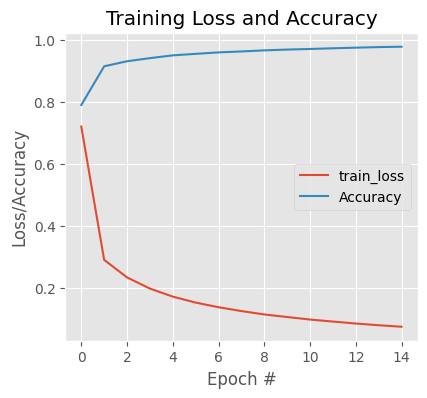

In [ ]:
# Step 7: Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label="train_loss")
plt.plot(H.history['accuracy'], label="Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()